<a href="https://colab.research.google.com/github/pankaj90382/TSAI/blob/master/S7/S7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import sys
S11_PROJECT_PATH = '/content/drive/My Drive/Colab Notebooks/Github_Repo/The_School_of_AI/TSAI/TSAI/S11'
sys.path.append(S11_PROJECT_PATH+'/S11_Modular_Code/')
import os
os.chdir(S11_PROJECT_PATH+'/S11_Modular_Code/')

In [0]:
from __future__ import print_function
import torch
import torchvision
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
#!pip install torchsummary
from torchsummary import summary
import pandas as pd
import numpy as np
from utils import *
import cv2

# Dataloader Arguments & Test/Train Dataloaders


In [5]:
# Downloading TrainSet
trainset = datasets.CIFAR10(root='./data', train=True,
                                        download=True)
# Downloading Testset
testset = datasets.CIFAR10(root='./data', train=False,
                                       download=True)

Files already downloaded and verified
Files already downloaded and verified


In [6]:
# Calculating Mean and Std dev
# We'd need to convert it into Numpy! Remember above we have converted it into tensors already
mean, std = get_meanstd(trainset, testset)

print(mean, std)


[0.49186878 0.48265391 0.44717728] [0.24697121 0.24338894 0.26159259]


In [7]:
!pip install -U git+https://github.com/albu/albumentations > /dev/null && echo "All libraries are successfully installed!"

  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-x7wn38zw
All libraries are successfully installed!


In [0]:
from Album_Methods import Albumentations as AM

In [9]:
AM().transArguDetails("RandomRotate90", "HorizontalFlip", "ShiftScaleRotate", "GridDistortion", "Normalize")

RandomRotate90 : ArgSpec(args=['self', 'always_apply', 'p'], varargs=None, keywords=None, defaults=(False, 0.5)) ,
HorizontalFlip : ArgSpec(args=['self', 'always_apply', 'p'], varargs=None, keywords=None, defaults=(False, 0.5)) ,
ShiftScaleRotate : ArgSpec(args=['self', 'shift_limit', 'scale_limit', 'rotate_limit', 'interpolation', 'border_mode', 'value', 'mask_value', 'always_apply', 'p'], varargs=None, keywords=None, defaults=(0.0625, 0.1, 45, 1, 4, None, None, False, 0.5)) ,
GridDistortion : ArgSpec(args=['self', 'num_steps', 'distort_limit', 'interpolation', 'border_mode', 'value', 'mask_value', 'always_apply', 'p'], varargs=None, keywords=None, defaults=(5, 0.3, 1, 4, None, None, False, 0.5)) ,
Normalize : ArgSpec(args=['self', 'mean', 'std', 'max_pixel_value', 'always_apply', 'p'], varargs=None, keywords=None, defaults=((0.485, 0.456, 0.406), (0.229, 0.224, 0.225), 255.0, False, 1.0)) ,


In [0]:
train_args= {
'PadIfNeeded':{'min_height':40, 'min_width':40, 'border_mode':cv2.BORDER_CONSTANT, 'value':mean*255},
'RandomCrop':{'height':32, 'width':32, 'always_apply':True},
'HorizontalFlip' : {},
'Cutout':{'num_holes':1, 'max_h_size':8, 'max_w_size':8, 'p':0.4},
'Normalize' : {'mean':mean, 'std':std}
}

test_args={
    'Normalize' : {'mean':mean, 'std':std}
}

In [0]:
# Train Phase transformations
train_transforms = AM().transform(**train_args)

# Test Phase transformations
test_transforms = AM().transform(**test_args)

In [12]:
from DataLoader import DataLoader

SEED = 1

# Downloading TrainSet
trainset = datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=train_transforms)

# Downloading Testset
testset = datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=test_transforms)

# Creating object of a class
dataloader= DataLoader(shuffle=True, batch_size=512, seed=SEED, num_workers=2, pin_memory=True)


# train data loader
trainloader = dataloader.load(trainset)

# test data loader
testloader = dataloader.load(testset)

Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


The output of torchvision datasets are PILImage images of range [0, 1].
We transform them to Tensors of normalized range [-1, 1].



In [0]:
# classes in cifar 10
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Let us show some of the training images, for fun.



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([512, 3, 32, 32]) tensor([-0.0494, -0.0611, -0.0572]) tensor([0.9585, 0.9662, 0.9508])
  cat   cat  deer  frog truck  ship truck  bird   dog  ship   cat horse  bird  bird plane truck  ship  ship   car  ship truck  ship  bird horse  frog   car horse  deer   car truck truck truck   dog  frog horse   dog  bird  deer  deer  bird


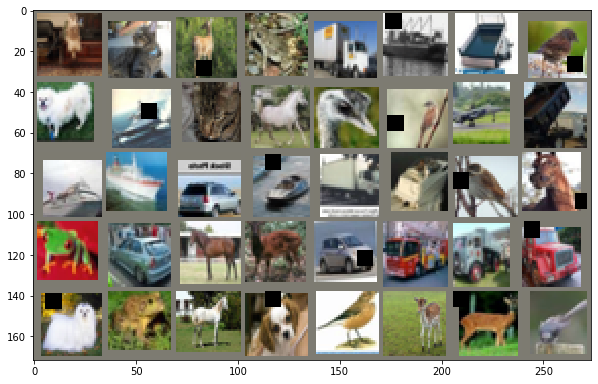

In [14]:
sample_images(trainloader, mean, std, classes, count=40)

2. Define a Convolution Neural Network
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Copy the neural network from the Neural Networks section before and modify it to
take 3-channel images (instead of 1-channel images as it was defined).



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

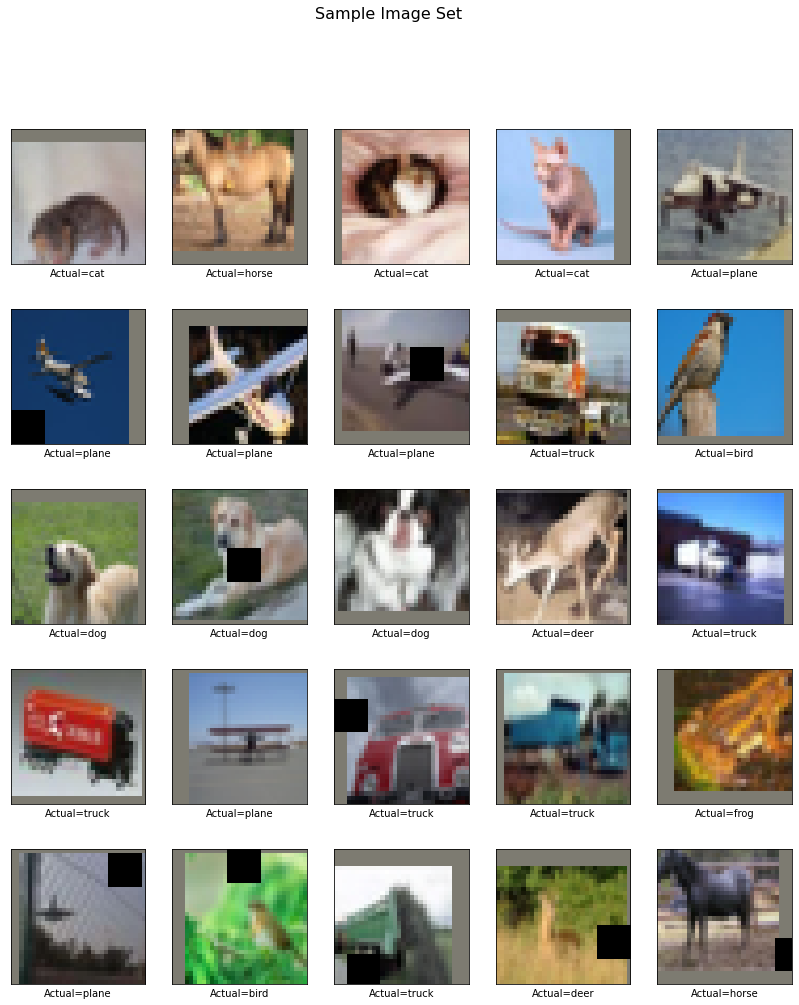

In [15]:
sample_images(trainloader, mean, std, classes, count=25, LabelClarity=True)

In [16]:
import torch.nn as nn
import torch.nn.functional as F
from Model import Resnet_Custom_Architecture
model = Resnet_Custom_Architecture(name="Model_LR_Finder")
model.to(dataloader.device)
model.summary(input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1, 256,

3. Define a Loss function and optimizer
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Let's use a Classification Cross-Entropy loss and SGD with momentum.



In [17]:
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
from LRFinder import LR_Finder
Loss="CrossEntropyLoss"
EPOCHS = 1
model.device=dataloader.device
optimizer = optim.SGD(model.parameters(), lr=1e-5, momentum=0.9)
lrfinder = LR_Finder(optimizer)
optimizer, scheduler = lrfinder.range_test(start_lr=None, end_lr=3,num_iter=len(trainloader)*EPOCHS, step_mode="linear", smooth_f=0.05, diverge_th=5)
#scheduler=StepLR(optimizer,step_size=5,gamma=0.1)
model.gotrain(optimizer=optimizer, train_loader=trainset, test_loader=testloader, dataloader=dataloader, epochs=EPOCHS, statspath=S11_PROJECT_PATH+"/Save_Model/", scheduler=scheduler, batch_scheduler=lrfinder, L1lambda=0, LossType=Loss)

Batch=12 Loss=3.6547 Acc=10.63%:  16%|█▌        | 11/69 [00:51<04:31,  4.68s/it]

Stopping early, the loss has diverged


SystemExit: ignored

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


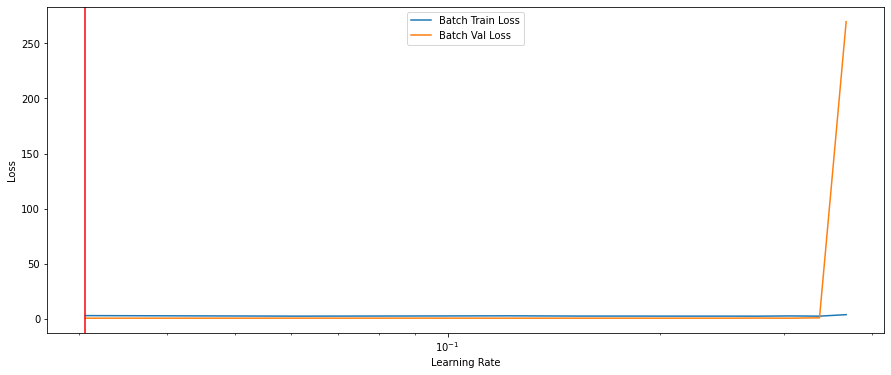

In [18]:
lrfinder.plot(load_path=S11_PROJECT_PATH+'/Save_Model/Model_LR_Finder_stats.json',cols=["batch_train_loss", "batch_val_loss"], ylabel='Loss', legend_arr=['Batch Train Loss', 'Batch Val Loss'], title='Complete_LR_Finder_Curve', save_path=S11_PROJECT_PATH+"/Save_Model/", skip_start=0, skip_end=0, log_lr=True, show_lr=lrfinder.best_learn)

Best LR Rate - 0.030622142857142855


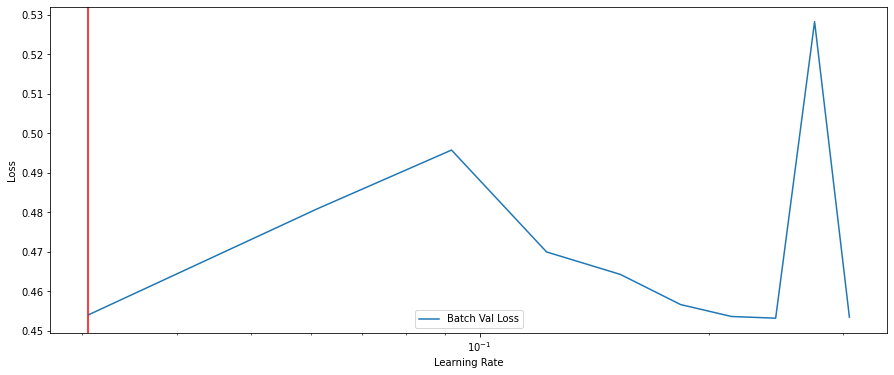

In [20]:
print('Best LR Rate -', lrfinder.best_learn)
lrfinder.plot(load_path=S11_PROJECT_PATH+'/Save_Model/Model_LR_Finder_stats.json',cols=["batch_val_loss"], ylabel='Loss', legend_arr=['Batch Val Loss'], title='LR_Finder_Curve', save_path=S11_PROJECT_PATH+"/Save_Model/", skip_start=0, skip_end=2, log_lr=True, show_lr=lrfinder.best_learn)

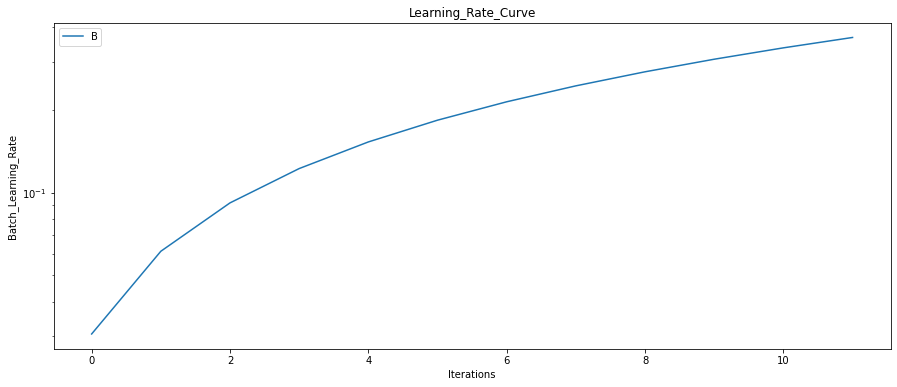

In [21]:
plot_graph(load_path=S11_PROJECT_PATH+'/Save_Model/Model_LR_Finder_stats.json', cols=["batch_lr"], legend_arr='Batch_Learning_Curve', xlabel='Iterations', ylabel='Batch_Learning_Rate', title='Learning_Rate_Curve', save_path=S11_PROJECT_PATH+'/Save_Model/',log=True)

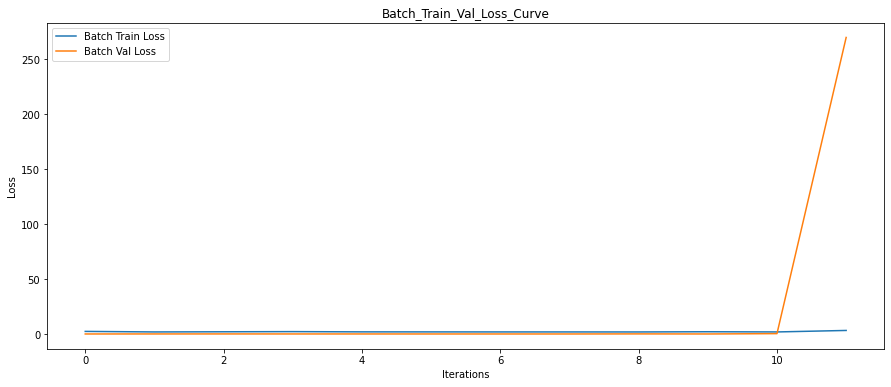

In [22]:
plot_graph(load_path=S11_PROJECT_PATH+'/Save_Model/Model_LR_Finder_stats.json', cols=["batch_train_loss", "batch_val_loss"], legend_arr=['Batch Train Loss', 'Batch Val Loss'], xlabel='Iterations', ylabel='Loss', title='Batch_Train_Val_Loss_Curve', save_path=S11_PROJECT_PATH+'/Save_Model/')

In [23]:
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
model = Resnet_Custom_Architecture(name="Model_Res")
model.to(dataloader.device)
Loss="CrossEntropyLoss"
EPOCHS = 24
model.device=dataloader.device
optimizer = optim.SGD(model.parameters(), lr=lrfinder.best_learn, weight_decay=0.0019 ,momentum=0.9)
#scheduler = ReduceLROnPlateau(optimizer, mode="min", factor=0.1, patience=3, verbose=True, min_lr=1e-5)
#scheduler=StepLR(optimizer,step_size=5,gamma=0.1)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=lrfinder.best_learn, steps_per_epoch=len(trainloader), epochs=EPOCHS,  pct_start=5/EPOCHS, div_factor=10, final_div_factor=1, anneal_strategy='linear' )
model.gotrain(optimizer=optimizer, train_loader=trainloader, test_loader=testloader, dataloader=dataloader, epochs=EPOCHS, statspath=S11_PROJECT_PATH+"/Save_Model/", scheduler=scheduler, batch_scheduler=True, L1lambda=0, LossType=Loss)

  0%|          | 0/98 [00:00<?, ?it/s]

Validation loss decreased (100000.000000 --> 0.027823).  Saving model ...
Epoch: 1, Train set: Average loss: 0.0035, Accuracy: 39.01%; Test set: Average loss: 0.0278, Accuracy: 53.33%
Learning Rate = 0.008585


  0%|          | 0/98 [00:00<?, ?it/s]

Epoch: 2, Train set: Average loss: 0.0023, Accuracy: 59.12%; Test set: Average loss: 0.0293, Accuracy: 54.41%
Learning Rate = 0.014109


  0%|          | 0/98 [00:00<?, ?it/s]

Validation loss decreased (0.027823 --> 0.016246).  Saving model ...
Epoch: 3, Train set: Average loss: 0.0018, Accuracy: 68.62%; Test set: Average loss: 0.0162, Accuracy: 73.74%
Learning Rate = 0.019632


  0%|          | 0/98 [00:00<?, ?it/s]

Epoch: 4, Train set: Average loss: 0.0015, Accuracy: 73.78%; Test set: Average loss: 0.0228, Accuracy: 66.49%
Learning Rate = 0.025155


  0%|          | 0/98 [00:00<?, ?it/s]

Validation loss decreased (0.016246 --> 0.013796).  Saving model ...
Epoch: 5, Train set: Average loss: 0.0012, Accuracy: 78.21%; Test set: Average loss: 0.0138, Accuracy: 78.85%
Learning Rate = 0.030607


  0%|          | 0/98 [00:00<?, ?it/s]

Epoch: 6, Train set: Average loss: 0.0011, Accuracy: 81.43%; Test set: Average loss: 0.0147, Accuracy: 77.41%
Learning Rate = 0.029157


  0%|          | 0/98 [00:00<?, ?it/s]

Epoch: 7, Train set: Average loss: 0.0009, Accuracy: 84.34%; Test set: Average loss: 0.0146, Accuracy: 77.53%
Learning Rate = 0.027706


  0%|          | 0/98 [00:00<?, ?it/s]

Validation loss decreased (0.013796 --> 0.010678).  Saving model ...
Epoch: 8, Train set: Average loss: 0.0008, Accuracy: 86.29%; Test set: Average loss: 0.0107, Accuracy: 82.88%
Learning Rate = 0.026256


  0%|          | 0/98 [00:00<?, ?it/s]

Validation loss decreased (0.010678 --> 0.010205).  Saving model ...
Epoch: 9, Train set: Average loss: 0.0007, Accuracy: 87.43%; Test set: Average loss: 0.0102, Accuracy: 84.34%
Learning Rate = 0.024805


  0%|          | 0/98 [00:00<?, ?it/s]

Validation loss decreased (0.010205 --> 0.010201).  Saving model ...
Epoch: 10, Train set: Average loss: 0.0007, Accuracy: 88.26%; Test set: Average loss: 0.0102, Accuracy: 84.20%
Learning Rate = 0.023355


  0%|          | 0/98 [00:00<?, ?it/s]

Validation loss decreased (0.010201 --> 0.008324).  Saving model ...
Epoch: 11, Train set: Average loss: 0.0006, Accuracy: 89.86%; Test set: Average loss: 0.0083, Accuracy: 87.40%
Learning Rate = 0.021904


  0%|          | 0/98 [00:00<?, ?it/s]

Epoch: 12, Train set: Average loss: 0.0005, Accuracy: 90.64%; Test set: Average loss: 0.0085, Accuracy: 86.77%
Learning Rate = 0.020454


  0%|          | 0/98 [00:00<?, ?it/s]

Validation loss decreased (0.008324 --> 0.007066).  Saving model ...
Epoch: 13, Train set: Average loss: 0.0005, Accuracy: 91.51%; Test set: Average loss: 0.0071, Accuracy: 88.71%
Learning Rate = 0.019003


  0%|          | 0/98 [00:00<?, ?it/s]

Epoch: 14, Train set: Average loss: 0.0004, Accuracy: 92.48%; Test set: Average loss: 0.0095, Accuracy: 85.97%
Learning Rate = 0.017553


  0%|          | 0/98 [00:00<?, ?it/s]

Epoch: 15, Train set: Average loss: 0.0004, Accuracy: 92.93%; Test set: Average loss: 0.0094, Accuracy: 86.33%
Learning Rate = 0.016102


  0%|          | 0/98 [00:00<?, ?it/s]

Validation loss decreased (0.007066 --> 0.006788).  Saving model ...
Epoch: 16, Train set: Average loss: 0.0004, Accuracy: 93.75%; Test set: Average loss: 0.0068, Accuracy: 89.18%
Learning Rate = 0.014652


  0%|          | 0/98 [00:00<?, ?it/s]

Epoch: 17, Train set: Average loss: 0.0003, Accuracy: 94.01%; Test set: Average loss: 0.0080, Accuracy: 87.61%
Learning Rate = 0.013201


  0%|          | 0/98 [00:00<?, ?it/s]

Validation loss decreased (0.006788 --> 0.006486).  Saving model ...
Epoch: 18, Train set: Average loss: 0.0003, Accuracy: 94.79%; Test set: Average loss: 0.0065, Accuracy: 90.18%
Learning Rate = 0.011751


  0%|          | 0/98 [00:00<?, ?it/s]

Epoch: 19, Train set: Average loss: 0.0003, Accuracy: 95.60%; Test set: Average loss: 0.0072, Accuracy: 89.33%
Learning Rate = 0.010300


  0%|          | 0/98 [00:00<?, ?it/s]

Epoch: 20, Train set: Average loss: 0.0002, Accuracy: 95.83%; Test set: Average loss: 0.0071, Accuracy: 89.71%
Learning Rate = 0.008850


  0%|          | 0/98 [00:00<?, ?it/s]

Epoch: 21, Train set: Average loss: 0.0002, Accuracy: 96.23%; Test set: Average loss: 0.0066, Accuracy: 89.98%
Learning Rate = 0.007399


  0%|          | 0/98 [00:00<?, ?it/s]

Validation loss decreased (0.006486 --> 0.006451).  Saving model ...
Epoch: 22, Train set: Average loss: 0.0002, Accuracy: 96.91%; Test set: Average loss: 0.0065, Accuracy: 90.62%
Learning Rate = 0.005948


  0%|          | 0/98 [00:00<?, ?it/s]

Validation loss decreased (0.006451 --> 0.006124).  Saving model ...
Epoch: 23, Train set: Average loss: 0.0002, Accuracy: 97.29%; Test set: Average loss: 0.0061, Accuracy: 90.92%
Learning Rate = 0.004498


Batch=2352 Loss=0.0390 Acc=97.87%: 100%|██████████| 98/98 [00:16<00:00,  6.07it/s]


Validation loss decreased (0.006124 --> 0.005581).  Saving model ...
Epoch: 24, Train set: Average loss: 0.0001, Accuracy: 97.87%; Test set: Average loss: 0.0056, Accuracy: 91.85%
Learning Rate = 0.003047



In [0]:
#model.device=dataloader.device
#model = model_builder(model_class=Resnet_Architecture, weights_path=S11_PROJECT_PATH+'/Save_Model/Model.pt', local_device=model.device)

In [25]:
class_acurracy(model, model.device, trainloader, classes)

Accuracy of plane : 98 %
Accuracy of   car : 99 %
Accuracy of  bird : 97 %
Accuracy of   cat : 95 %
Accuracy of  deer : 98 %
Accuracy of   dog : 95 %
Accuracy of  frog : 99 %
Accuracy of horse : 99 %
Accuracy of  ship : 99 %
Accuracy of truck : 98 %


In [0]:
MisClassifiedImages, MisClassifiedPredLabels, MisClassifiedTargLabels = get_classified_images(model, model.device, testloader, classification='Miss')

In [0]:
CorrClassifiedImages, CorrClassifiedPredLabels, CorrClassifiedTargLabels = get_classified_images(model, model.device, testloader, classification='Corr')

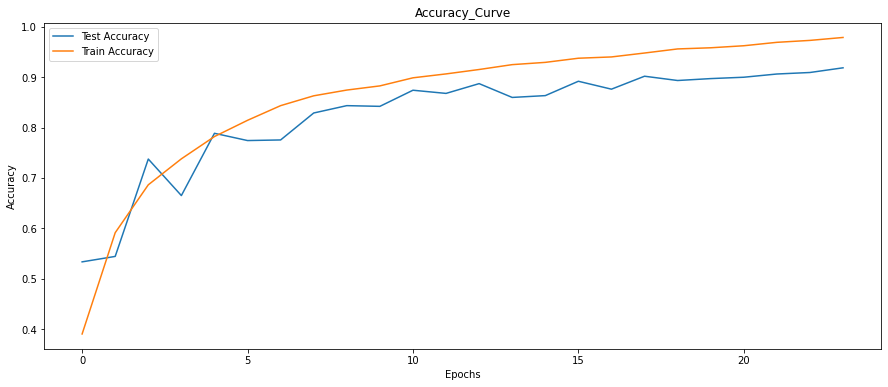

In [28]:
#cols = ["batch_train_loss", "batch_train_acc", "batch_lr","avg_test_loss", "test_acc", "train_acc", "avg_train_loss", "lr", "best_test_loss", "epochs"]
plot_graph(load_path=S11_PROJECT_PATH+'/Save_Model/Model_Res_stats.json', cols=["test_acc", "train_acc"], legend_arr=['Test Accuracy', 'Train Accuracy'], xlabel='Epochs', ylabel='Accuracy', title='Accuracy_Curve', save_path=S11_PROJECT_PATH+'/Save_Model/')

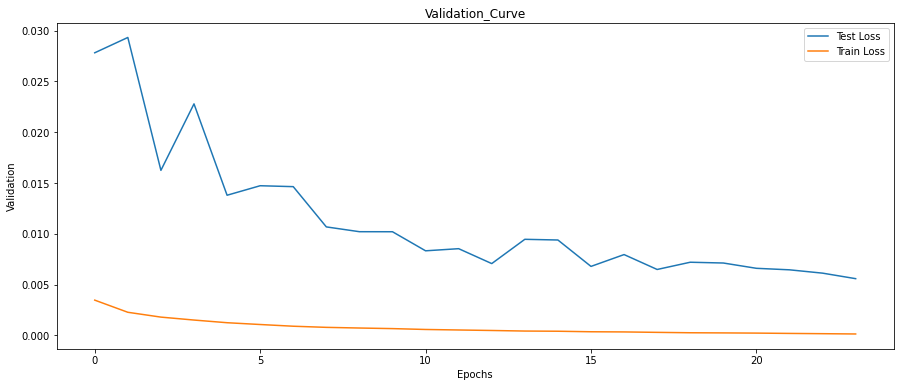

In [29]:
plot_graph(load_path=S11_PROJECT_PATH+'/Save_Model/Model_Res_stats.json', cols=["avg_test_loss","avg_train_loss"], legend_arr=['Test Loss', 'Train Loss'], xlabel='Epochs', ylabel='Validation', title='Validation_Curve', save_path=S11_PROJECT_PATH+'/Save_Model/')

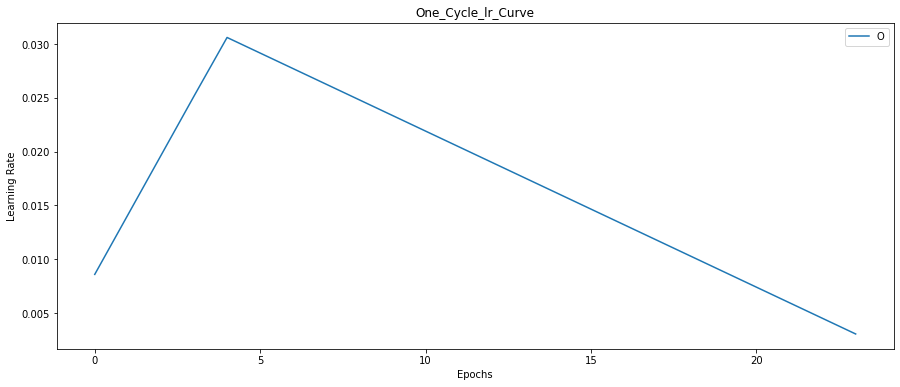

In [30]:
plot_graph(load_path=S11_PROJECT_PATH+'/Save_Model/Model_Res_stats.json', cols=["lr"], legend_arr="One-Cycle Learning Rate", xlabel='Epochs', ylabel='Learning Rate', title='One_Cycle_lr_Curve', save_path=S11_PROJECT_PATH+'/Save_Model/')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


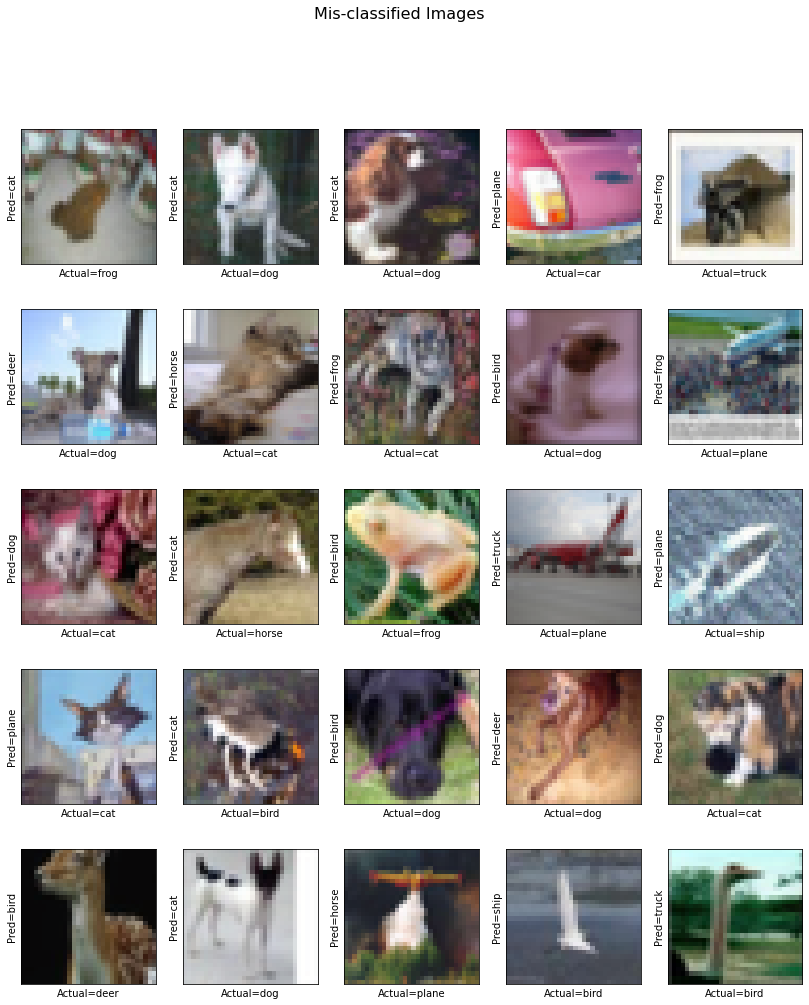

In [31]:
show_classified(MisClassifiedImages, MisClassifiedPredLabels, MisClassifiedTargLabels, classes, mean, std,"Mis-classified Images",S11_PROJECT_PATH+'/Save_Model/',25)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


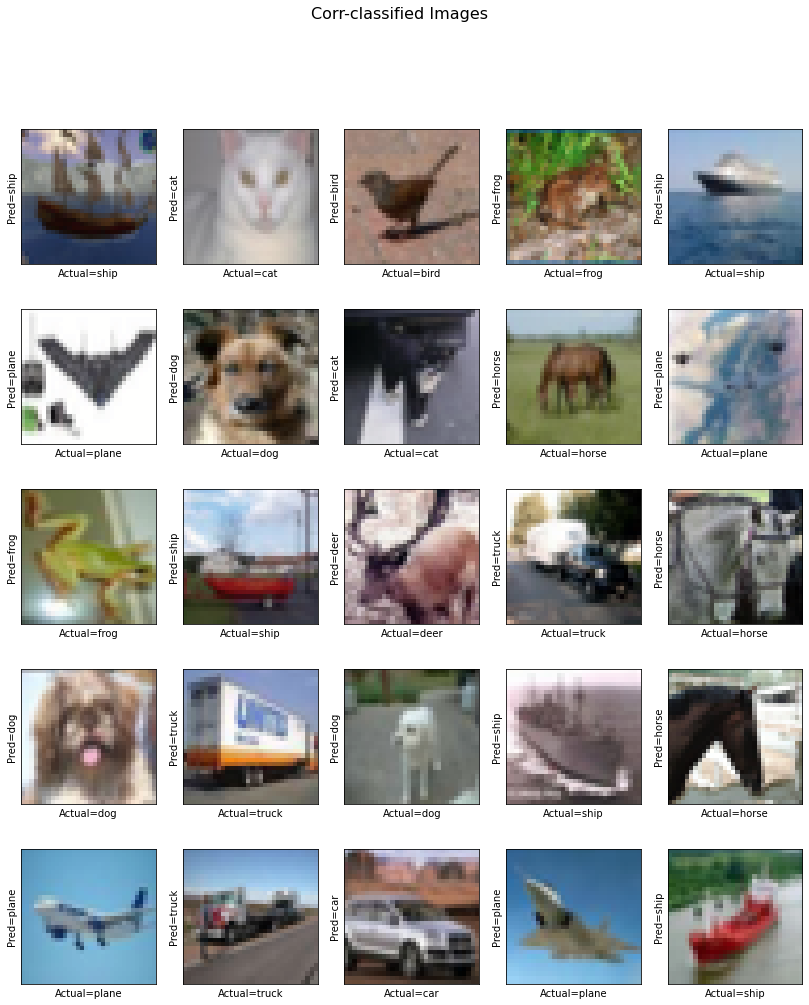

In [32]:
show_classified(CorrClassifiedImages, CorrClassifiedPredLabels, CorrClassifiedTargLabels, classes, mean, std,"Corr-classified Images",S11_PROJECT_PATH+'/Save_Model/',25)

In [0]:
from GradCam import VisualizeCam

In [0]:
target_layers = ["layer0", "layer1", "layer2", "layer3"]
viz_cam = VisualizeCam(model, classes, target_layers)

torch.Size([25, 10])
Generating Grad-CAM @layer0
Generating Grad-CAM @layer1
Generating Grad-CAM @layer2
Generating Grad-CAM @layer3


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

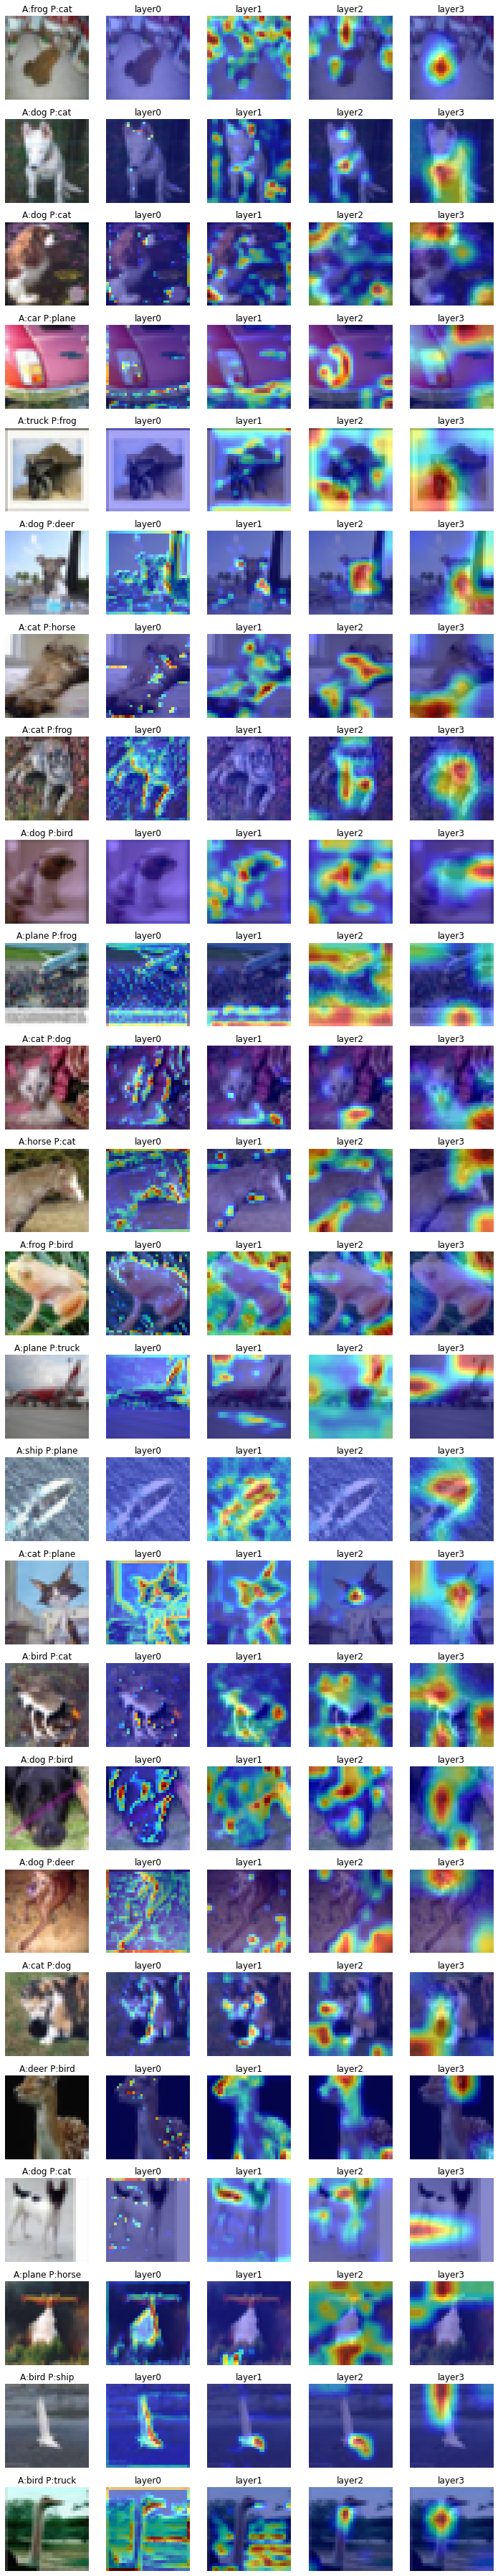

In [35]:
viz_cam(MisClassifiedImages[:25], MisClassifiedTargLabels[:25], target_layers, mean, std, target_inds=MisClassifiedTargLabels[:25], metric="Incorrect", per_image=False, path=S11_PROJECT_PATH+"/Save_Model/")

torch.Size([25, 10])
Generating Grad-CAM @layer0
Generating Grad-CAM @layer1
Generating Grad-CAM @layer2
Generating Grad-CAM @layer3


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


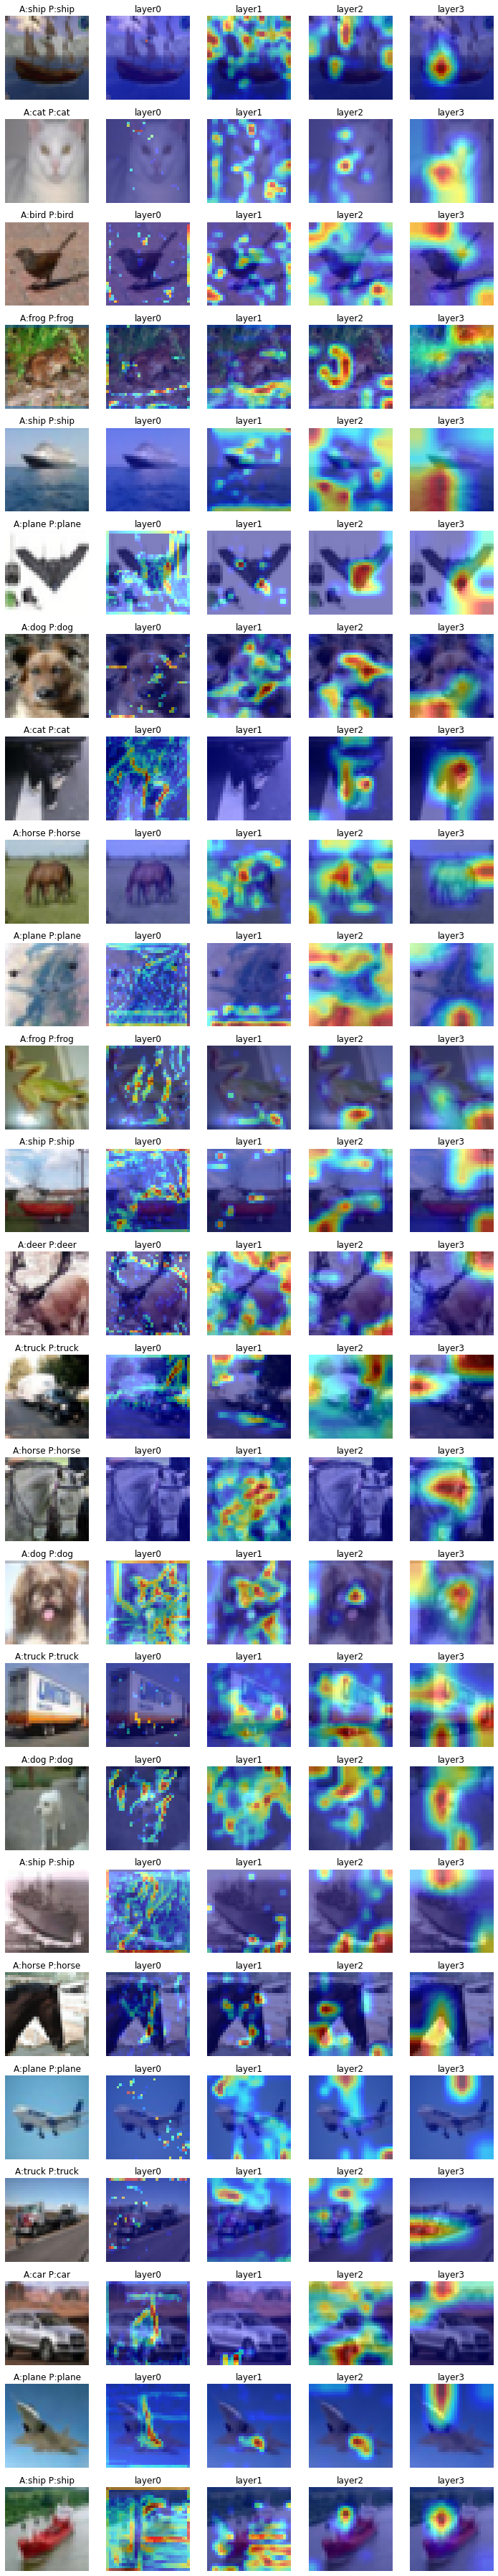

In [36]:
viz_cam(CorrClassifiedImages[:25], CorrClassifiedTargLabels[:25], target_layers, mean, std, target_inds=None, metric="Correct", per_image=False, path=S11_PROJECT_PATH+"/Save_Model/")

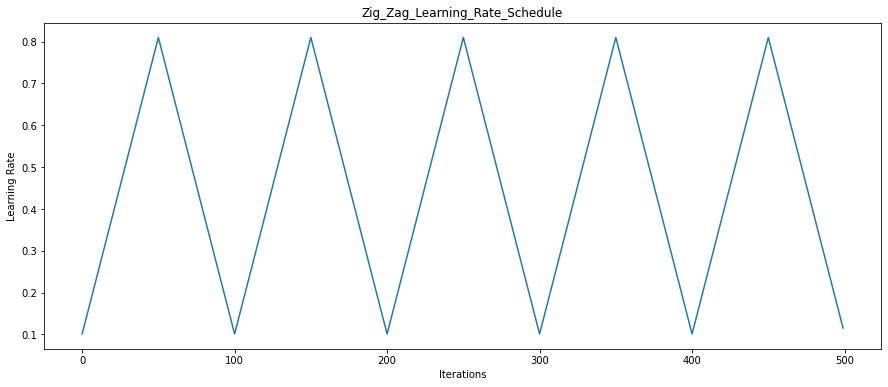

In [37]:
# Zig-Zag Plot
from math import floor
import matplotlib.pyplot as plt
iterations = 500
lr_max = 0.81
lr_min = lr_max / 8
step_size = 50
cycle_size = step_size * 2
lrrrr = []
for curr_iter in range(iterations):
  cycle = floor(1 + curr_iter/cycle_size)
  x = abs(curr_iter/step_size - (2 * cycle) + 1)
  lr_t = lr_min + (lr_max - lr_min)*(1 - x)
  lrrrr.append(lr_t)
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(lrrrr)
ax.set(xlabel='Iterations', ylabel='Learning Rate')
plt.title('Zig_Zag_Learning_Rate_Schedule')
plt.show()
fig.savefig(S11_PROJECT_PATH+"/Save_Model/Zig_Zag_Learning.jpg")